IMPORTS

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

DATASET READING


In [45]:
df = pd.read_csv("insurance.txt",sep = ",")
df.insert(0,'0th_feature',1)

DATA VISUALIZATION

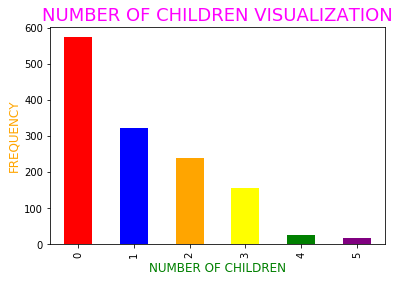

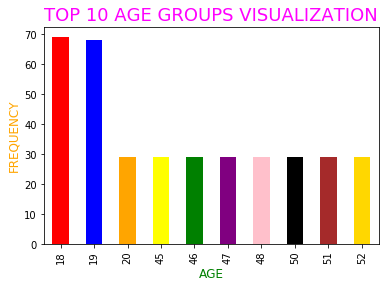

In [46]:
colormap = ['red','blue','orange','yellow','green','purple','pink','black','brown','gold']
plot1 = plt.figure(1)
df['children'].value_counts().sort_index().plot.bar(color = colormap)
plt.title('NUMBER OF CHILDREN VISUALIZATION',fontsize = 18,color = 'magenta')
plt.xlabel('NUMBER OF CHILDREN',color = 'green',fontsize = 12)
plt.ylabel('FREQUENCY',color = 'orange',fontsize = 12)
plot2 = plt.figure(2)
df['age'].value_counts()[:10].sort_index().plot.bar(color = colormap)
plt.title('TOP 10 AGE GROUPS VISUALIZATION',fontsize = 18,color = 'magenta')
plt.xlabel('AGE',color = 'green',fontsize = 12)
plt.ylabel('FREQUENCY',color = 'orange',fontsize = 12)
plt.show()

PREPROCESSING

In [47]:
def standardize(x,u,sigma):
  return (x-u)/sigma

In [48]:
def preprocessing(df):
  mean_age = df.mean()['age']
  age_variance =df.std()['age']
  mean_bmi = df.mean()['bmi']
  bmi_variance = df.std()['bmi']
  mean_children = df.mean()['children']
  children_variance = df.std()['children']
  mean_charges = df.mean()['charges']
  charges_variance = df.std()['charges']  
  df['age'] = df['age'].apply(lambda x : standardize(x,mean_age,age_variance)) 
  df['bmi'] = df['bmi'].apply(lambda x : standardize(x,mean_bmi,bmi_variance)) 
  df['children'] = df['children'].apply(lambda x : standardize(x,mean_children,children_variance)) 
  df['charges']  = df['charges'].apply(lambda x : standardize(x,mean_charges,charges_variance)) 
  return df    

FUNCTIONS

In [49]:
def error_value(w,X,y):
  return (np.sum((np.dot(X,w) - y)**2))/(2)

In [50]:
def gradient_descent(w,X,y,alpha,printError):
  error = []
  for i in range(10000):
    if printError == True:
      if i%500 == 0:
        print(error_value(w,X,y))
    error.append(error_value(w,X,y))
    A = X.transpose()
    B = X.dot(w) - y
    dw = A.dot(B)
    w = w - (alpha*dw)/len(X)
  return w,error 

In [51]:
def predict(parameters,X_test):
  return np.dot(X_test,parameters)

In [52]:
def RMSE(y_true,y_pred):
  return np.sqrt(((y_true - y_pred) ** 2).mean())

TRAINING AND TESTING PHASES

In [53]:
train_errors = []
train_sum_of_squares = []
test_sum_of_squares = []
test_errors = []
weights_list = []
for k in range(20):
  #TRAINING PHASE 

  df = df.sample(frac=1, random_state=k*100)
  df = df.reset_index(drop = True)
  df = preprocessing(df)
  train_size = int(0.7*len(df))
  X_train = np.array(df.drop(['charges'], axis = 1)[:train_size])
  X_test = np.array(df.drop(['charges'], axis = 1)[train_size:])
  y_train = np.array(df['charges'][:train_size]).reshape(int(0.7*len(df)),1)
  y_test = np.array(df['charges'][train_size:]).reshape(len(df) - train_size,1 )
  w = np.random.rand(4,1) 
  print("Error values for model {} every 500 iterations are :".format(k+1))
  weights,error = gradient_descent(w,X_train,y_train,0.001,printError = True)
  print("\n")

  weights_list.append(weights)
  y_train_pred = predict(weights,X_train)

  train_sum_of_square_error = error_value(weights,X_train,y_train)
  train_sum_of_squares.append(train_sum_of_square_error)

  train_error = RMSE(y_train,y_train_pred)
  train_errors.append(train_error)

  # TESTING PHASE
  
  y_pred = predict(weights,X_test)

  test_sum_of_square_error = error_value(weights,X_test,y_test)
  test_sum_of_squares.append(test_sum_of_square_error)

  error = RMSE(y_test,y_pred)
  test_errors.append(error)

Error values for model 1 every 500 iterations are :
627.3926163264578
483.1358795733496
430.59571665452046
411.33753230608175
404.23432470236196
401.59832603173356
400.61427971521175
400.24480247896145
400.10530078567064
400.0523459088387
400.0321399017897
400.024391438016
400.0214058937265
400.0202502697009
400.01980099973156
400.0196256080002
400.0195568639021
400.0195298180515
400.01951913931373
400.0195149086421


Error values for model 2 every 500 iterations are :
927.1838762921641
578.9377954143274
463.27637872994455
424.72024855298673
411.81540973178437
407.47705928018144
406.01159972175446
405.5140139135326
405.3441207930621
405.285767707889
405.2655983109682
405.25858029645525
405.2561212580904
405.2552533662749
405.25494475419
405.25483417332066
405.25479424217525
405.2547797102279
405.25477438053997
405.2547724108316


Error values for model 3 every 500 iterations are :
1211.2961069997255
692.0882992457281
514.7292329607046
454.0287317378955
433.2111535479437
426.05548616593

TRAINING VISUALIZATION FOR THREE DIFFERENT LEARNING RATES


In [54]:
train_size = int(0.7*len(df))
X_train = np.array(df.drop(['charges'], axis = 1)[:train_size])
X_test = np.array(df.drop(['charges'], axis = 1)[train_size:])
y_train = np.array(df['charges'][:train_size]).reshape(int(0.7*len(df)),1)
y_test = np.array(df['charges'][train_size:])
w = np.array([0,0,0,0]).reshape(4,1)
weights1,error1 = gradient_descent(w,X_train,y_train,0.001,printError = False)


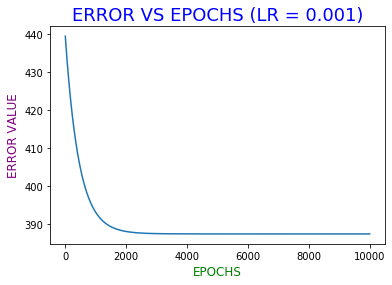

In [55]:
plot1 = plt.figure(1)
plt.title('ERROR VS EPOCHS (LR = 0.001)',fontsize = 18,color = 'blue')
plt.xlabel('EPOCHS',color = 'green',fontsize = 12)
plt.ylabel('ERROR VALUE',color = 'purple',fontsize = 12)
x = x=[i for i in range(len(error1))]
y=error1
plt.plot(x,y)


MODEL EVALUATION

In [56]:
test_errors = np.array(test_errors)
print("For the training set, mean sum of square of errors = {} and variance square of errors = {}".format(np.mean(train_sum_of_squares),np.var(train_sum_of_squares)))
print("For the test set, mean sum of square of errors = {} and variance square of errors = {}".format(np.mean(test_sum_of_squares),np.var(test_sum_of_squares)))
print("For the training set, mean RMSE = {} and variance RMSE = {}".format(np.mean(train_errors),np.var(train_errors)))
print("For the test set, mean RMSE = {} and  variance RMSE = {}".format(np.mean(test_errors),np.var(test_errors)))

For the training set, mean sum of square of errors = 412.8898086782019 and variance square of errors = 143.83108602662716
For the test set, mean sum of square of errors = 176.21883094549622 and variance square of errors = 144.94412806575767
For the training set, mean RMSE = 0.9391778196300498 and variance RMSE = 0.0001882040512743213
For the test set, mean RMSE = 0.935795956666289 and  variance RMSE = 0.0009965292059117168


WEIGHT MATRICES OF THE 20 MODELS


In [57]:
for index,i in enumerate(weights_list):
  print("Weights of model {} are :".format(index+1),i)

Weights of model 1 are : [[-0.01546797]
 [ 0.28770465]
 [ 0.16786443]
 [ 0.05469173]]
Weights of model 2 are : [[-0.01304863]
 [ 0.27363849]
 [ 0.16037355]
 [ 0.0620774 ]]
Weights of model 3 are : [[0.01278753]
 [0.27787136]
 [0.19455739]
 [0.04085729]]
Weights of model 4 are : [[-0.04398032]
 [ 0.29866083]
 [ 0.13851456]
 [ 0.06655583]]
Weights of model 5 are : [[-0.01271582]
 [ 0.30956645]
 [ 0.14999989]
 [ 0.04867943]]
Weights of model 6 are : [[0.01095304]
 [0.26930927]
 [0.1799522 ]
 [0.06428075]]
Weights of model 7 are : [[0.03017936]
 [0.29059967]
 [0.20672131]
 [0.06658258]]
Weights of model 8 are : [[0.01616063]
 [0.28911471]
 [0.18914531]
 [0.02548899]]
Weights of model 9 are : [[-0.01165562]
 [ 0.28573586]
 [ 0.16291292]
 [ 0.03639381]]
Weights of model 10 are : [[0.00223021]
 [0.2606153 ]
 [0.17243039]
 [0.03274282]]
Weights of model 11 are : [[0.00292632]
 [0.28265979]
 [0.18079758]
 [0.05353281]]
Weights of model 12 are : [[0.03097152]
 [0.29494361]
 [0.19911839]
 [0.0684